<a href="https://colab.research.google.com/github/andisutrakhusnulkarima/DeepLearning/blob/main/week6/week6_RNN_LSTM_GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

WEEK6

In [8]:
# Mengunggah file JSON
from google.colab import files
import os
import json

# Mengunggah file JSON
uploaded = files.upload()

# Cek file yang diunggah
os.listdir('/content/')

# Membaca file JSON yang diunggah baris per baris
with open('/content/DeteksiSarkasme.json', 'r') as f:
    # Membaca setiap baris dalam file
    data = f.readlines()

# Mengonversi setiap baris menjadi objek JSON
json_data = [json.loads(line) for line in data]

# Menampilkan beberapa data pertama
print(json_data[:5])

# Ekstraksi teks dan label
texts = [item['headline'] for item in json_data if 'headline' in item]
labels = [item['is_sarcastic'] for item in json_data if 'is_sarcastic' in item]

# Menampilkan contoh teks dan label
print(texts[:5])  # Menampilkan 5 teks pertama
print(labels[:5])  # Menampilkan 5 label pertama


Saving DeteksiSarkasme.json to DeteksiSarkasme.json
[{'article_link': 'https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5', 'headline': "former versace store clerk sues over secret 'black code' for minority shoppers", 'is_sarcastic': 0}, {'article_link': 'https://www.huffingtonpost.com/entry/roseanne-revival-review_us_5ab3a497e4b054d118e04365', 'headline': "the 'roseanne' revival catches up to our thorny political mood, for better and worse", 'is_sarcastic': 0}, {'article_link': 'https://local.theonion.com/mom-starting-to-fear-son-s-web-series-closest-thing-she-1819576697', 'headline': "mom starting to fear son's web series closest thing she will have to grandchild", 'is_sarcastic': 1}, {'article_link': 'https://politics.theonion.com/boehner-just-wants-wife-to-listen-not-come-up-with-alt-1819574302', 'headline': 'boehner just wants wife to listen, not come up with alternative debt-reduction ideas', 'is_sarcastic': 1}, {'article_link': 'https://www.huffi

In [11]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Tokenisasi
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

# Padding sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, padding='post', maxlen=200)
X_test_pad = pad_sequences(X_test_seq, padding='post', maxlen=200)

# Menampilkan contoh data setelah preprocessing
print("Teks pertama setelah preprocessing:", X_train_pad[0])
print("Label pertama:", y_train[0])


Teks pertama setelah preprocessing: [2378  386  731   14  905    1    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0 

In [12]:
# Pastikan X_train_pad dan y_train adalah numpy arrays
import numpy as np

X_train_pad = np.array(X_train_pad)
y_train = np.array(y_train)


In [13]:
# Cek dimensi dan tipe data
print(type(X_train_pad), X_train_pad.shape)
print(type(y_train), y_train.shape)


<class 'numpy.ndarray'> (21367, 200)
<class 'numpy.ndarray'> (21367,)


In [14]:
import tensorflow as tf

# Konversi ke TensorFlow Tensor
X_train_tensor = tf.convert_to_tensor(X_train_pad)
y_train_tensor = tf.convert_to_tensor(y_train)


In [15]:
# 3. Membuat model Deep Learning (RNN, LSTM, GRU)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, RNN, GRU, Bidirectional, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Model RNN dengan Bidirectional untuk meningkatkan akurasi
def create_rnn_model():
    model = Sequential([
        Embedding(input_dim=10000, output_dim=128, input_length=200),
        Bidirectional(RNN(tf.keras.layers.SimpleRNNCell(512), return_sequences=True)),  # Bidirectional RNN
        Dropout(0.4),  # Dropout untuk regularisasi
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Model LSTM dengan lebih banyak unit
def create_lstm_model():
    model = Sequential([
        Embedding(input_dim=10000, output_dim=128, input_length=200),
        Bidirectional(LSTM(512, return_sequences=True)),  # Bidirectional LSTM
        LSTM(256),  # LSTM dengan lebih banyak unit
        Dropout(0.4),  # Dropout untuk mencegah overfitting
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Model GRU dengan lebih banyak unit
def create_gru_model():
    model = Sequential([
        Embedding(input_dim=10000, output_dim=128, input_length=200),
        Bidirectional(GRU(512, return_sequences=True)),  # Bidirectional GRU
        GRU(256),  # GRU dengan lebih banyak unit
        Dropout(0.4),  # Dropout untuk mencegah overfitting
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [25]:
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, RNN, GRU, Bidirectional, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Asumsi bahwa data sudah ada (X_train, y_train, X_test, y_test)
# X_train, X_test = [daftar teks], y_train, y_test = [label]
# Membaca dan mempersiapkan data (contoh langkah tokenisasi dan padding)
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, padding='post', maxlen=200)
X_test_pad = pad_sequences(X_test_seq, padding='post', maxlen=200)

# Fungsi untuk membangun model (RNN, LSTM, atau GRU)
def build_model(model_type='rnn', units=128, dropout=0.2, learning_rate=1e-3):
    model = Sequential([
        Embedding(input_dim=10000, output_dim=128, input_length=200),
        Bidirectional(
            RNN(tf.keras.layers.SimpleRNNCell(units), return_sequences=True) if model_type == 'rnn' else
            LSTM(units, return_sequences=True) if model_type == 'lstm' else
            GRU(units, return_sequences=True)
        ),
        Dropout(dropout),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy', metrics=['accuracy'])
    return model


Epoch 1/5
167/167 ━━━━━━━━━━━━━━━━━━━━ 15s 60ms/step - accuracy: 0.6335 - loss: 0.6172 - val_accuracy: 0.8297 - val_loss: 0.3633
Epoch 2/5
167/167 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - accuracy: 0.8946 - loss: 0.2542 - val_accuracy: 0.8673 - val_loss: 0.3097
Epoch 3/5
167/167 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.9580 - loss: 0.1208 - val_accuracy: 0.8618 - val_loss: 0.3444
167/167 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step


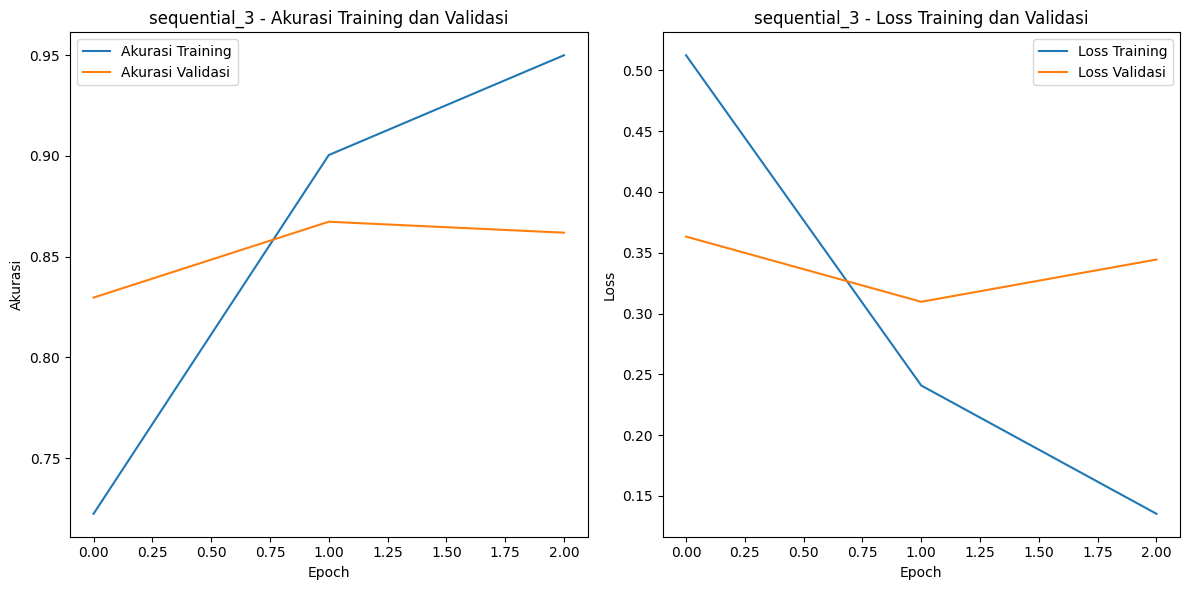

RNN Results:
Akurasi: 0.8673, Precision: 0.8320, Recall: 0.8743, F1-Score: 0.8526, AUC: 0.8680
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


167/167 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.6927 - loss: 0.5523 - val_accuracy: 0.8551 - val_loss: 0.3277
Epoch 2/5
167/167 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9111 - loss: 0.2234 - val_accuracy: 0.8684 - val_loss: 0.3147
Epoch 3/5
167/167 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9534 - loss: 0.1325 - val_accuracy: 0.8589 - val_loss: 0.3707
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


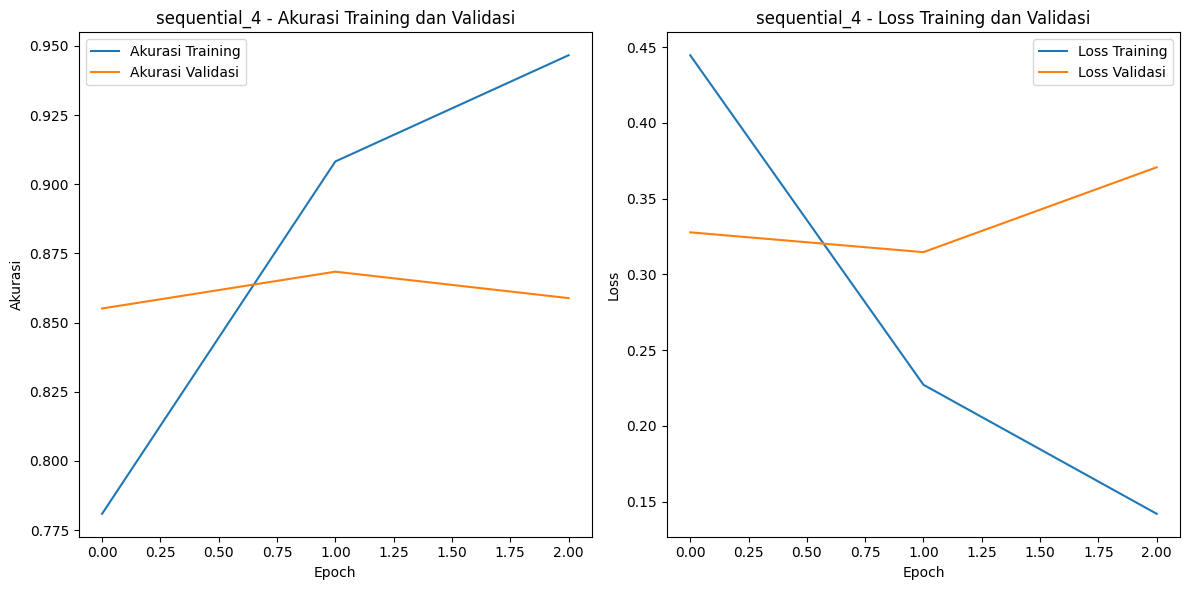


LSTM Results:
Akurasi: 0.8684, Precision: 0.8424, Recall: 0.8615, F1-Score: 0.8518, AUC: 0.8676
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


167/167 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.7155 - loss: 0.5245 - val_accuracy: 0.8497 - val_loss: 0.3373
Epoch 2/5
167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.9184 - loss: 0.2069 - val_accuracy: 0.8663 - val_loss: 0.3254
Epoch 3/5
167/167 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9498 - loss: 0.1336 - val_accuracy: 0.8575 - val_loss: 0.3596
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


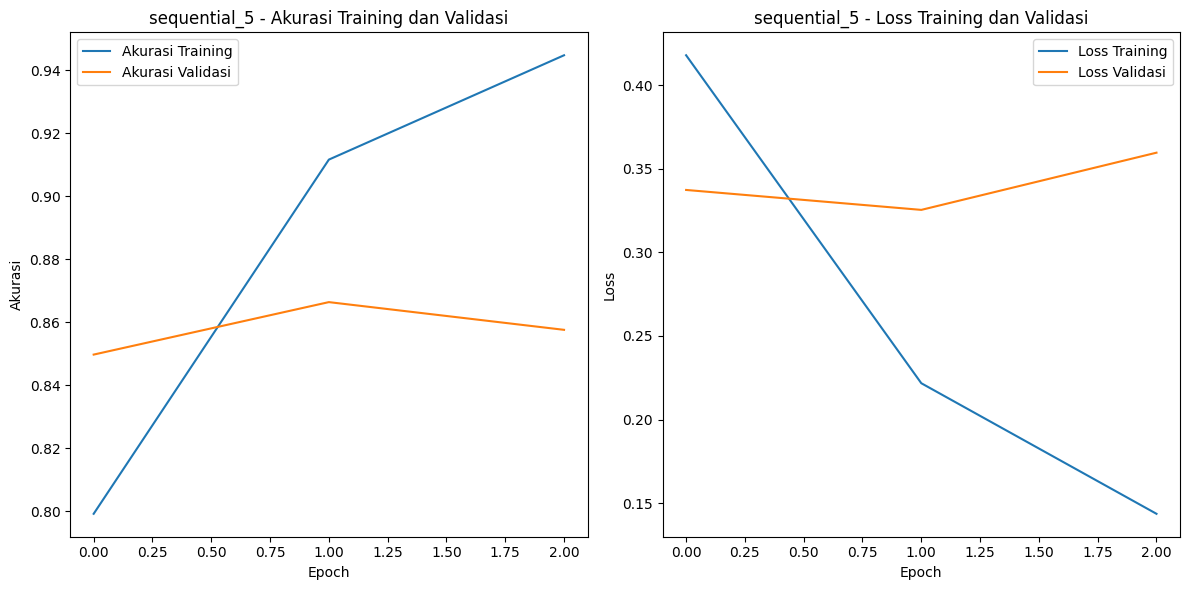


GRU Results:
Akurasi: 0.8663, Precision: 0.8582, Recall: 0.8333, F1-Score: 0.8456, AUC: 0.8628


In [28]:
import tensorflow as tf

# Pastikan X_train_pad dan y_train adalah numpy arrays
X_train_pad = tf.convert_to_tensor(X_train_pad)
y_train = tf.convert_to_tensor(y_train)
X_test_pad = tf.convert_to_tensor(X_test_pad)
y_test = tf.convert_to_tensor(y_test)

# 1. Fungsi model_builder yang sudah ada sebelumnya
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, RNN, GRU, Bidirectional, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from keras_tuner import Hyperband

def build_model(model_type='rnn', units=128, dropout=0.2, learning_rate=1e-3):
    model = Sequential([
        Embedding(input_dim=10000, output_dim=128, input_length=200),
        Bidirectional(
            RNN(tf.keras.layers.SimpleRNNCell(units), return_sequences=False) if model_type == 'rnn' else
            LSTM(units, return_sequences=False) if model_type == 'lstm' else
            GRU(units, return_sequences=False)
        ),
        Dropout(dropout),
        Dense(1, activation='sigmoid')  # Output layer
    ])

    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy', metrics=['accuracy'])
    return model


# 2. Fungsi untuk melatih dan mengevaluasi model
def train_and_evaluate(model, X_train_pad, y_train, X_test_pad, y_test):
    early_stopping = EarlyStopping(monitor='val_loss', patience=1, restore_best_weights=True)
    history = model.fit(X_train_pad, y_train, epochs=5, validation_data=(X_test_pad, y_test), batch_size=128, callbacks=[early_stopping])

    # Prediksi dan evaluasi
    y_pred = model.predict(X_test_pad)
    y_pred = (y_pred > 0.5)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)

    # Visualisasi
    plt.figure(figsize=(12, 6))

    # Plot Akurasi
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Akurasi Training')
    plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
    plt.legend()
    plt.title(f'{model.name} - Akurasi Training dan Validasi')
    plt.xlabel('Epoch')
    plt.ylabel('Akurasi')

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Loss Training')
    plt.plot(history.history['val_loss'], label='Loss Validasi')
    plt.legend()
    plt.title(f'{model.name} - Loss Training dan Validasi')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    plt.tight_layout()
    plt.show()

    return accuracy, precision, recall, f1, auc

# Melatih dan mengevaluasi RNN
rnn_model = build_model(model_type='rnn', units=128)
rnn_accuracy, rnn_precision, rnn_recall, rnn_f1, rnn_auc = train_and_evaluate(rnn_model, X_train_pad, y_train, X_test_pad, y_test)
print("RNN Results:")
print(f"Akurasi: {rnn_accuracy:.4f}, Precision: {rnn_precision:.4f}, Recall: {rnn_recall:.4f}, F1-Score: {rnn_f1:.4f}, AUC: {rnn_auc:.4f}")

# Melatih dan mengevaluasi LSTM
lstm_model = build_model(model_type='lstm', units=128)
lstm_accuracy, lstm_precision, lstm_recall, lstm_f1, lstm_auc = train_and_evaluate(lstm_model, X_train_pad, y_train, X_test_pad, y_test)
print("\nLSTM Results:")
print(f"Akurasi: {lstm_accuracy:.4f}, Precision: {lstm_precision:.4f}, Recall: {lstm_recall:.4f}, F1-Score: {lstm_f1:.4f}, AUC: {lstm_auc:.4f}")

# Melatih dan mengevaluasi GRU
gru_model = build_model(model_type='gru', units=128)
gru_accuracy, gru_precision, gru_recall, gru_f1, gru_auc = train_and_evaluate(gru_model, X_train_pad, y_train, X_test_pad, y_test)
print("\nGRU Results:")
print(f"Akurasi: {gru_accuracy:.4f}, Precision: {gru_precision:.4f}, Recall: {gru_recall:.4f}, F1-Score: {gru_f1:.4f}, AUC: {gru_auc:.4f}")
